In [1]:
from aeons.endpoint import EndModel, IncrementEndpoint, endpoints_calc
from aeons.tools import pickle_dump, pickle_in, load_samples, aeons_dir, chains, write_to_txt, read_from_txt, get_samples
from aeons.tools import aeons_dir, proj_dir
from anesthetic import read_chains
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/home/zixiao/Documents/III/project/aeons/aeons/covariance.py:89: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def X_mu(nk):
/home/zixiao/Documents/III/project/aeons/aeons/covariance.py:95: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def X_Sigma(nk):


In [2]:
format = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 9pt font in plots, to match 9pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    'axes.linewidth': 0.5,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'patch.linewidth': 0.5,
    'legend.fancybox': False,
    'legend.shadow': False,
    'legend.frameon': False
}
plt.rcParams.update(format)

#### Increment endpoint

In [3]:
for i, chain in enumerate(chains):
    name, samples = get_samples('lcdm', chain)
    print(i, name)
    model = IncrementEndpoint(samples, N_rolling=1000)
    iterations, predictions = model.predictions(N=50, N_fit=1000)
    write_to_txt(f'lcdm_linear/{name}', [iterations, predictions, model.true_endpoint])

0 lcdm_BAO
Iteration 1000 invalid
Iteration 1342 invalid
Iteration 1685 invalid
1 lcdm_lensing
Iteration 1000 invalid
Iteration 1360 invalid
Iteration 1721 invalid
2 lcdm_lensing_BAO
Iteration 1000 invalid
Iteration 1422 invalid
Iteration 1844 invalid
3 lcdm_lensing_SH0ES
Iteration 1000 invalid
Iteration 1393 invalid
Iteration 1786 invalid
4 lcdm_planck
Iteration 1000 invalid
5 lcdm_planck_BAO
Iteration 1000 invalid
6 lcdm_planck_lensing
Iteration 1000 invalid
7 lcdm_planck_SH0ES
Iteration 1000 invalid
8 lcdm_planck_lensing_BAO
Iteration 1000 invalid
9 lcdm_planck_lensing_SH0ES
Iteration 1000 invalid
10 lcdm_SH0ES
Iteration 1000 invalid
Iteration 1281 invalid
Iteration 1563 invalid
Iteration 1845 invalid


#### Gaussian endpoint

In [3]:
true_endpoints = np.zeros_like(chains, dtype=int)
for i, chain in enumerate(chains):
    name, samples = get_samples('lcdm', chain)
    model = IncrementEndpoint(samples, N_rolling=500)
    true_endpoints[i] = model.true_endpoint
true_endpoints

array([18129, 19034, 22108, 20672, 57372, 58216, 58100, 57424, 57852,
       58032, 15096])

In [4]:
name, samples = get_samples('lcdm', 'BAO')
print(i, name)
endmodel = EndModel(samples)
iterations = np.linspace(0.1*len(samples), len(samples), 20, endpoint=False).astype(int)
logXfs, logXfs_std = endmodel.logXfs(iterations, Nset=10)
logXs = samples.logX().iloc[iterations]

10 lcdm_BAO


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


In [ ]:
nlive = 1000
dlogX = logXfs - logXs
iterations_rem = dlogX * -nlive

In [7]:
for i, chain in enumerate(chains[6:]):
    name, samples = get_samples('lcdm', chain)
    print(i, name)
    endmodel = EndModel(samples)
    iterations = np.linspace(0.1*len(samples), len(samples), 40, endpoint=False).astype(int)
    logXfs, logXfs_std = endmodel.logXfs(iterations, Nset=10)
    logXs = samples.logX().iloc[iterations]
    endpoints, endpoints_std = endpoints_calc(iterations, logXs, logXfs, logXfs_std, nlive=1000)
    write_to_txt(f'lcdm_predictions_gauss/{name}_1', [iterations, endpoints, endpoints_std, true_endpoints[i]])

0 lcdm_planck_lensing


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


1 lcdm_planck_SH0ES


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))
/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/scipy/special/_logsumexp.py:111: RuntimeWarning: overflow encountered in exp
  tmp = np.exp(a - a_max)
/home/zixiao/Documents/III/project/aeons/aeons/endpoint.py:24: RuntimeWarning: invalid value encountered in double_scalars
  xf_reg = gammaincinv(d/2, np.exp(logend)/gamma(d/2))
/home/zixiao/Documents/III/project/aeons/aeons/endpoint.py:21: RuntimeWarning: invalid value encountered in double_scalars
  loglive = np.log( gamma(d/2) * gammainc(d/2, Xi**(2/d)/(2*sigma**2)) )


2 lcdm_planck_lensing_BAO


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))
/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/scipy/special/_logsumexp.py:111: RuntimeWarning: overflow encountered in exp
  tmp = np.exp(a - a_max)
/home/zixiao/Documents/III/project/aeons/aeons/endpoint.py:24: RuntimeWarning: invalid value encountered in double_scalars
  xf_reg = gammaincinv(d/2, np.exp(logend)/gamma(d/2))
/home/zixiao/Documents/III/project/aeons/aeons/endpoint.py:21: RuntimeWarning: invalid value encountered in double_scalars
  loglive = np.log( gamma(d/2) * gammainc(d/2, Xi**(2/d)/(2*sigma**2)) )


3 lcdm_planck_lensing_SH0ES


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))
/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/scipy/special/_logsumexp.py:111: RuntimeWarning: overflow encountered in exp
  tmp = np.exp(a - a_max)
/home/zixiao/Documents/III/project/aeons/aeons/endpoint.py:24: RuntimeWarning: invalid value encountered in double_scalars
  xf_reg = gammaincinv(d/2, np.exp(logend)/gamma(d/2))


4 lcdm_SH0ES


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))
/home/zixiao/Documents/III/project/aeons/aeons/lm_partial.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  return numerator/denominator
/home/zixiao/Documents/III/project/aeons/aeons/lm_partial.py:28: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_squared_analytic(d, Xdata, logLdata))
/home/zixiao/Documents/III/project/aeons/aeons/endpoint.py:21: RuntimeWarning: divide by zero encountered in log
  loglive = np.log( gamma(d/2) * gammainc(d/2, Xi**(2/d)/(2*sigma**2)) )
/home/zixiao/Documents/III/project/aeons/aeons/endpoint.py:25: RuntimeWarning: invalid value encountered in double_scalars
  return d/2 * np.log(2*sigma**2 * xf_reg)
/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: Runt

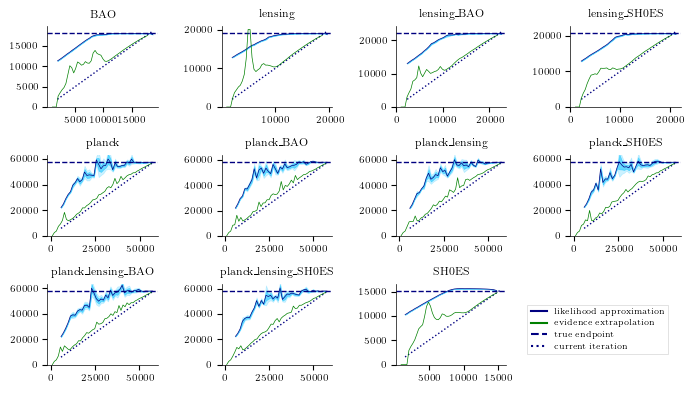

In [3]:
fig, axs = plt.subplots(3, 4, figsize=(7, 4))
axs = axs.flatten()
fig.delaxes(axs[-1])
for i, chain in enumerate(chains):
    name, samples = get_samples('lcdm', chain)
    iterations, endpoints, endpoints_std, true_endpoint = read_from_txt(f'lcdm_predictions_gauss/{name}_1')
    axs[i].plot(iterations, endpoints, color='navy', lw=.5)
    axs[i].plot(iterations, iterations, color='navy', lw=1, ls=':')
    axs[i].fill_between(iterations, endpoints - endpoints_std, endpoints + endpoints_std, color='deepskyblue', alpha=.5)
    axs[i].fill_between(iterations, endpoints - 2*endpoints_std, endpoints + 2*endpoints_std, color='deepskyblue', alpha=.2)
    axs[i].axhline(y=true_endpoint, lw=1, ls='--', color='navy')
    axs[i].set_ylim(0, true_endpoint*1.1)
    title = name[5:]
    axs[i].set_title(title, fontsize=8)

    iterations_linear, predictions_linear, _ = read_from_txt(f'lcdm_predictions_linear/{name}')
    axs[i].plot(iterations_linear, predictions_linear, color='green', lw=.5)

from matplotlib.lines import Line2D
line0 = Line2D([0], [0], color='navy', label='likelihood approximation')
line1 = Line2D([0], [0], color='green', label='evidence extrapolation')
line2 = Line2D([0], [0], ls='--', color='navy', label='true endpoint')
line3 = Line2D([0], [0], ls=':', color='navy', label='current iteration')
fig.legend(handles=[line0, line1, line2, line3], loc=(0.76, 0.1), fontsize=6, frameon=True)
fig.tight_layout()
fig.savefig(f'{proj_dir}/paper/Figures/lcdm_predictions.pdf', format='pdf')

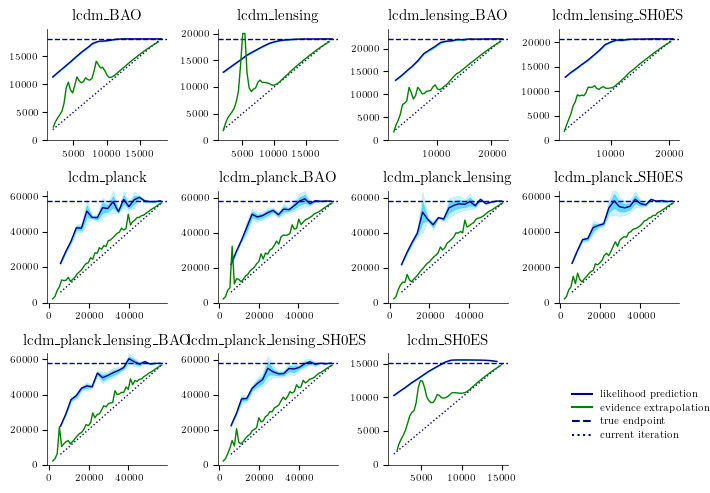

In [4]:
fig, axs = plt.subplots(3, 4, figsize=(7, 5))
axs = axs.flatten()
fig.delaxes(axs[-1])
for i, chain in enumerate(chains):
    name, samples = get_samples('lcdm', chain)
    iterations, endpoints, endpoints_std, true_endpoint = read_from_txt(f'lcdm_predictions_gauss/{name}')
    axs[i].plot(iterations, endpoints, color='navy', lw=1)
    axs[i].plot(iterations, iterations, color='navy', lw=1, ls=':')
    axs[i].fill_between(iterations, endpoints - endpoints_std, endpoints + endpoints_std, color='deepskyblue', alpha=.5)
    axs[i].fill_between(iterations, endpoints - 2*endpoints_std, endpoints + 2*endpoints_std, color='deepskyblue', alpha=.2)
    axs[i].axhline(y=true_endpoint, lw=1, ls='--', color='navy')
    axs[i].set_ylim(0, true_endpoint*1.1)
    axs[i].set_title(name)

    iterations_linear, predictions_linear, true_endpoint = read_from_txt(f'lcdm_predictions_linear/{name}_1')
    axs[i].plot(iterations_linear, predictions_linear, color='green', lw=1)

from matplotlib.lines import Line2D
line0 = Line2D([0], [0], color='navy', label='likelihood prediction')
line1 = Line2D([0], [0], color='green', label='evidence extrapolation')
line2 = Line2D([0], [0], ls='--', color='navy', label='true endpoint')
line3 = Line2D([0], [0], ls=':', color='navy', label='current iteration')
fig.legend(handles=[line0, line1, line2, line3], loc=(0.8, 0.1))
fig.tight_layout()
fig.savefig(f'{proj_dir}/paper/Figures/lcdm_predictions.pdf', format='pdf')

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
axs = axs.flatten()
fig.delaxes(axs[-1])
for i, chain in enumerate(chains):
    name, samples = get_samples('lcdm', chain)
    iterations_linear, predictions_linear, true_endpoint = read_from_txt(f'lcdm_predictions_linear/{name}')
    axs[i].plot(iterations_linear, predictions_linear, color='green', lw=1)
    axs[i].plot(iterations_linear, iterations_linear, color='navy', lw=1, ls=':')
    axs[i].axhline(y=true_endpoint, lw=1, ls='--', color='navy')
    axs[i].set_ylim(0, true_endpoint*1.1)
    axs[i].set_title(name)
fig.tight_layout()
fig.savefig('lcdm_predictions_linear.pdf', format='pdf')

### **Corrected linear model**

In [5]:
from scipy.special import logsumexp
def add_logZ(samples):    
    logw = samples.logw()
    logZ = np.zeros_like(logw)
    logZ[0] = logw.iloc[0]
    for i in range(1, len(samples)):
        logZ[i] = logsumexp([logZ[i-1], logw.iloc[i]])
    samples['logZ'] = logZ
    return samples

def get_dlogZ(logZ):
    logZ = pd.Series(logZ)
    dlogZ = logZ.diff(1)[1:]
    return dlogZ

def get_dlogZ_rolling(dlogZ, N_rolling):
    dlogZ = pd.Series(dlogZ)
    dlogZ_rolling = dlogZ.rolling(N_rolling).mean()
    dlogZ_rolling.dropna(inplace=True)
    return dlogZ_rolling

import numpy.polynomial.polynomial as poly
def fit_dlogZ(dlogZ, deg):
    x = dlogZ.index.get_level_values(0).values
    y = dlogZ.values
    coefs = poly.polyfit(x, y, deg)
    return coefs


In [94]:
class IncrementEndpoint:
    def __init__(self, samples, N_rolling):
        self.samples = add_logZ(samples)
        self.logZ = self.samples['logZ']
        self.dlogZ = get_dlogZ(self.logZ)
        self.dlogZ_rolling = get_dlogZ_rolling(self.dlogZ, N_rolling)
        self.N_rolling = N_rolling
        self.rolling_index = self.dlogZ_rolling.index.get_level_values(0)
        self.true_endpoint = self.calc_endpoint() # using default value of 1e-3

    def plot_dlogZ(self):
        dlogZ = self.dlogZ
        plt.plot(dlogZ.index.get_level_values(0), dlogZ.values)

    def calc_endpoint(self, epsilon=1e-3):
        logZ = self.logZ
        logZ_tot = logZ.iloc[-1]
        logZ_f = np.log(1 - epsilon) + logZ_tot
        index_f = logZ[logZ > logZ_f].index.get_level_values(0)[0]
        return index_f

    def index(self, iteration):
        return self.dlogZ.iloc[iteration:].index.get_level_values(0).values
    
    def dlogZ_fit(self, iteration, steps, step):
        index = np.arange(iteration - steps*step, iteration+step, step)
        return self.dlogZ_rolling.iloc[index - self.N_rolling]
    
    def pred(self, iteration, steps, step):
        index = np.arange(iteration - steps*step, len(self.samples))
        dlogZ_fit = self.dlogZ_fit(iteration, steps, step)
        coefs = fit_dlogZ(dlogZ_fit, 1)
        dlogZ_pred = poly.polyval(index, coefs)
        index_pred = index[dlogZ_pred > 0]
        dlogZ_pred = dlogZ_pred[dlogZ_pred > 0]
        return index_pred, dlogZ_pred

    def plot_pred(self, iteration, steps, step):
        index_pred, dlogZ_pred = self.pred(iteration, steps, step)
        dlogZ_rolling = self.dlogZ_rolling
        dlogZ_fit = self.dlogZ_fit(iteration, steps, step)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
        ax1.plot(dlogZ_rolling.index.get_level_values(0), dlogZ_rolling)
        ax1.plot(dlogZ_fit.index.get_level_values(0), dlogZ_fit, color='deepskyblue')
        ax1.plot(index_pred, dlogZ_pred, color='orange', lw=1)
        ax1.axvline(x = iteration, lw=.5, ls='--', color='deepskyblue')
        ax1.set_ylim(0, dlogZ_rolling.iloc[0])
        ax1.set_ylabel('$d\log Z$')

        ax2.plot(dlogZ_rolling.index.get_level_values(0), dlogZ_rolling)
        ax2.plot(dlogZ_fit.index.get_level_values(0), dlogZ_fit, color='deepskyblue')
        ax2.plot(index_pred, dlogZ_pred, color='orange', lw=1)
        ax2.axvline(x = iteration, lw=.5, ls='--', color='deepskyblue')
        ax2.set_xlim(iteration - steps*step, len(self.samples))
        ax2.set_ylim(0, dlogZ_fit.values[0]*1.5)
        plt.tight_layout()

    def iterations(self, iteration, steps, step, epsilon=1e-3):
        logZ_dead = self.logZ.loc[iteration]
        index_pred, dlogZ_pred = self.pred(iteration, steps, step)
        logZ_live = dlogZ_pred.sum()
        logZ_tot = logZ_dead + logZ_live
        logZ_f = np.log(1 - epsilon) + logZ_tot
        index_f = index_pred[np.argmax([logZ_dead + dlogZ_pred.cumsum() > logZ_f])]
        return logZ_dead, logZ_tot, index_f
    
    def predictions(self, N, steps, step):
        true_end = self.true_endpoint
        iterations = np.linspace(steps*step + self.N_rolling, true_end, N, endpoint=False).astype(int) # start at steps, step
        predictions = np.zeros(N)
        for i, iteration in enumerate(iterations):
            try:
                predictions[i] = self.iterations(iteration, steps, step)[-1]
            except:
                print(f'Iteration {iteration} invalid')
        return iterations, predictions
    
    def plot_predictions(self, N, steps, step):
        true_end = self.true_endpoint
        iterations, predictions = self.predictions(N, steps, step)
        plt.plot(iterations, predictions)
        plt.plot(iterations, iterations, lw=1, ls='--', color='deepskyblue')
        plt.axhline(y=true_end, lw=1, ls='--')
        plt.ylim(0, true_end*1.5)
        return iterations, predictions

### **Linear model endpoint prediction for BAO data**

In [296]:
name, samples = get_samples('lcdm', 'BAO')
model = IncrementEndpoint(samples, N_rolling=1000)

In [297]:
indices = model.dlogZ_fit(8000, 10, 200).index.get_level_values(0)
logZs = model.logZ[indices]
dlogZs = np.diff(logZs)
for i, index in enumerate(indices):
    logZ = np.round(logZs.iloc[i], 3)
    dlogZ = np.round(dlogZs[i-1], 3)
    print(f'{index} & {logZ:.3f} & {dlogZ:.3f} \\\ ')

TypeError: IncrementEndpoint.dlogZ_fit() takes 3 positional arguments but 4 were given

In [ ]:
iteration, steps, step = 8000, 20, 100
dlogZ_rolling = model.dlogZ_rolling
index_rolling = dlogZ_rolling.index.get_level_values(0)
dlogZ_fit = model.dlogZ_fit(iteration, steps, step)
index_fit = dlogZ_fit.index.get_level_values(0)
index_pred, dlogZ_pred = model.pred(iteration, steps, step)

known = index_rolling < iteration
index_known = index_rolling[known]
index_unknown = index_rolling[~known]
dlogZ_known, dlogZ_unknown = dlogZ_rolling[known], dlogZ_rolling[~known]

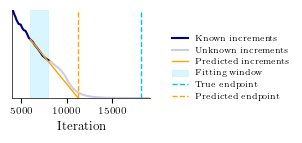

In [299]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.7, 1.5))
# ax1.plot(index_known, dlogZ_known, color='navy')
# ax1.plot(index_unknown, dlogZ_unknown, color='navy', alpha=.2)
# ax1.plot(index_pred, dlogZ_pred, color='orange', lw=1)
# ax1.axvspan(index_fit[0], index_fit[-1], alpha=0.15, color='deepskyblue')
# ax1.axvline(x=index_pred[-1], color='orange', lw=1, ls='--')
# ax1.axvline(x=model.true_endpoint, color='deepskyblue', lw=1, ls='--')
# ax1.set_ylim(0, dlogZ_rolling.iloc[0])

fig, ax2 = plt.subplots(figsize=(3.3, 1.5))
ax2.plot(index_known, dlogZ_known, color='navy', label='Known increments')
ax2.plot(index_unknown, dlogZ_unknown, color='navy', alpha=.2, label='Unknown increments')
ax2.plot(index_pred, dlogZ_pred, color='orange', lw=1, label='Predicted increments')
ax2.axvspan(index_fit[0], index_fit[-1], alpha=0.15, color='deepskyblue', label='Fitting window')
ax2.axvline(x=model.true_endpoint, color='deepskyblue', lw=1, ls='--', label='True endpoint')
ax2.axvline(x=index_pred[-1], color='orange', lw=1, ls='--', label='Predicted endpoint')
ax2.set_xlim(iteration - 2*steps*step, len(model.samples))
ax2.set_ylim(0, dlogZ_fit.values[0]*1.5)
ax2.set_xlabel('Iteration')
ax2.set_yticks([])
ax2.legend(bbox_to_anchor=(1.1, .8), fontsize=6)
fig.tight_layout()
plt.savefig(f'{proj_dir}/paper/Figures/linear_extrapolate.pdf', format='pdf')

### **Generate/plot predictions for Planck data**

In [66]:
for i, chain in enumerate(chains):
    name, samples = get_samples('lcdm', chain)
    print(i, name)
    model = IncrementEndpoint(samples, N_rolling=1000)
    iterations, predictions = model.predictions(N=50, steps=10, step=100)
    write_to_txt(f'lcdm_predictions_linear/{name}_1', [iterations, predictions, model.true_endpoint])

0 lcdm_BAO
1 lcdm_lensing
2 lcdm_lensing_BAO
3 lcdm_lensing_SH0ES
4 lcdm_planck
5 lcdm_planck_BAO
6 lcdm_planck_lensing
7 lcdm_planck_SH0ES
8 lcdm_planck_lensing_BAO
9 lcdm_planck_lensing_SH0ES
10 lcdm_SH0ES


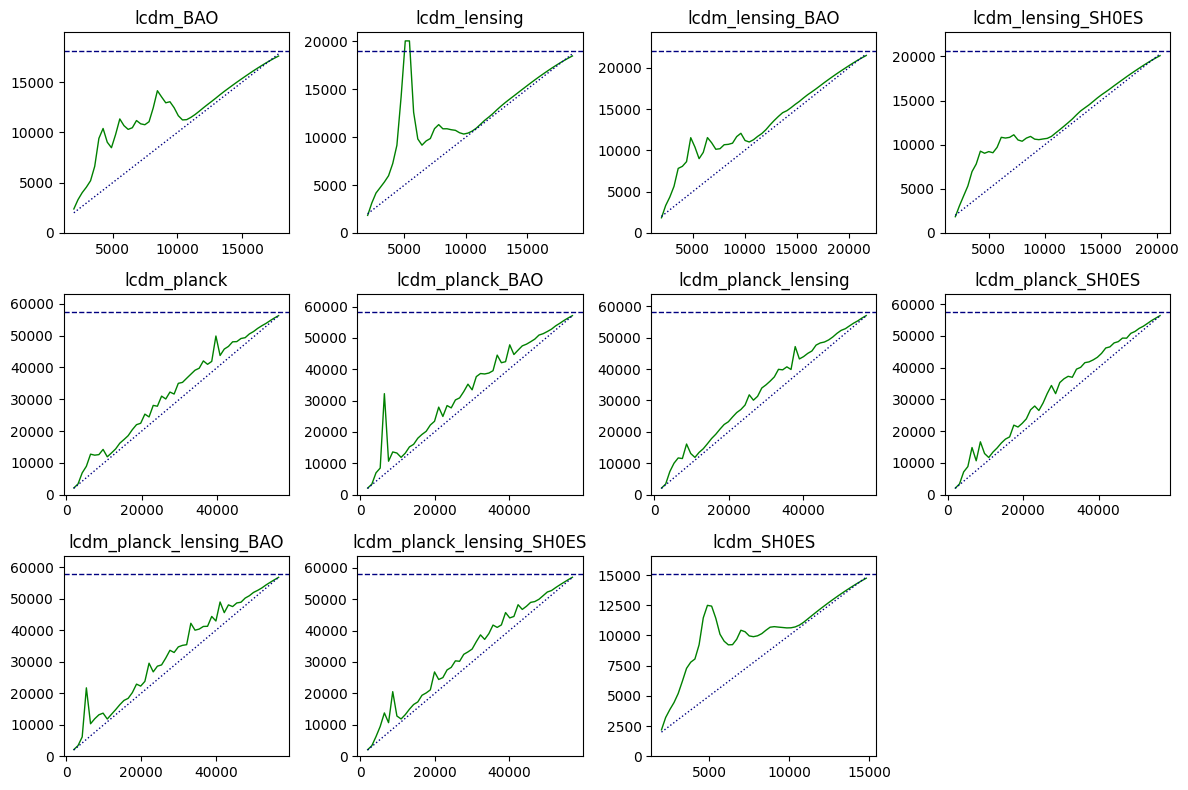

In [69]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
axs = axs.flatten()
fig.delaxes(axs[-1])
for i, chain in enumerate(chains):
    name, samples = get_samples('lcdm', chain)
    iterations_linear, predictions_linear, true_endpoint = read_from_txt(f'lcdm_predictions_linear/{name}_1')
    axs[i].plot(iterations_linear, predictions_linear, color='green', lw=1)
    axs[i].plot(iterations_linear, iterations_linear, color='navy', lw=1, ls=':')
    axs[i].axhline(y=true_endpoint, lw=1, ls='--', color='navy')
    axs[i].set_ylim(0, true_endpoint*1.1)
    axs[i].set_title(name)
fig.tight_layout()
fig.savefig(f'{proj_dir}/talk/Figures/lcdm_predictions_linear.pdf', format='pdf')

### **Generate/plot predictions for toy data**

In [177]:
from aeons.toy_samples import gaussian_samples, wedding_cake_samples, cauchy_samples

#### Gaussian

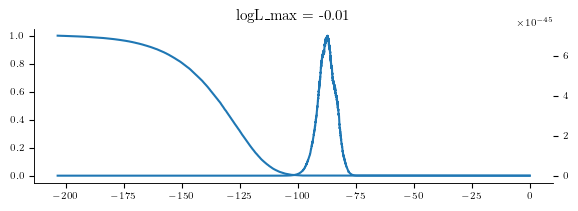

In [216]:
samples = pickle_in(f'{aeons_dir}/samples/toy/gauss_30_01.pickle')
model = EndModel(samples)
model.plot_lx()

In [217]:
true_endpoint = IncrementEndpoint(samples, N_rolling=500).true_endpoint

In [218]:
iterations = np.linspace(true_endpoint*0.1, true_endpoint, 20, endpoint=False).astype(int)
logXfs, logXfs_std = model.logXfs(iterations, Nset=15)
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = endpoints_calc(iterations, logXs, logXfs, logXfs_std, nlive=500)

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))
/home/zixiao/Documents/III/project/aeons/aeons/endpoint.py:24: RuntimeWarning: invalid value encountered in double_scalars
  xf_reg = gammaincinv(d/2, np.exp(logend)/gamma(d/2))
/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/scipy/special/_logsumexp.py:111: RuntimeWarning: overflow encountered in exp
  tmp = np.exp(a - a_max)
/home/zixiao/Documents/III/project/aeons/aeons/endpoint.py:21: RuntimeWarning: invalid value encountered in double_scalars
  loglive = np.log( gamma(d/2) * gammainc(d/2, Xi**(2/d)/(2*sigma**2)) )


In [222]:
write_to_txt(f'{aeons_dir}/notebooks/summer_1/toy_predictions_gauss/gauss', [iterations, endpoints, endpoints_std, true_endpoint])

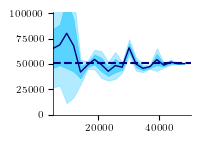

In [289]:
iterations, endpoints, endpoints_std, true_endpoint = read_from_txt(f'{aeons_dir}/notebooks/summer_1/toy_predictions_gauss/gauss')
plt.figure(figsize=(2.2, 1.5))
plt.plot(iterations, endpoints, lw=1, color='navy')
plt.fill_between(iterations, endpoints - endpoints_std, endpoints + endpoints_std, alpha=.5, color='deepskyblue')
plt.fill_between(iterations, endpoints - 2*endpoints_std, endpoints + 2*endpoints_std, alpha=.3, color='deepskyblue')
plt.axhline(y=true_endpoint, ls='--', color='navy')
plt.xlim(iterations[0], true_endpoint)
plt.ylim(0, true_endpoint*2)
plt.tight_layout()
plt.savefig(f'{proj_dir}/paper/Figures/gauss_predictions.pdf', format='pdf')

#### Wedding cake

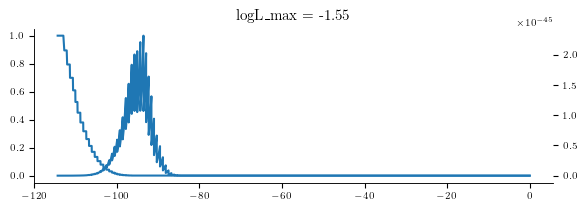

In [223]:
samples = pickle_in(f'{aeons_dir}/samples/toy/wedding_20_001.pickle')
model = EndModel(samples)
model.plot_lx()

In [224]:
true_endpoint = IncrementEndpoint(samples, N_rolling=500).true_endpoint

In [225]:
iterations = np.linspace(true_endpoint*0.1, true_endpoint, 20, endpoint=False).astype(int)
logXfs, logXfs_std = model.logXfs(iterations, Nset=25)
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = endpoints_calc(iterations, logXs, logXfs, logXfs_std, nlive=500)

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))
/home/zixiao/Documents/III/project/aeons/aeons/endpoint.py:24: RuntimeWarning: invalid value encountered in double_scalars
  xf_reg = gammaincinv(d/2, np.exp(logend)/gamma(d/2))
/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/scipy/special/_logsumexp.py:111: RuntimeWarning: overflow encountered in exp
  tmp = np.exp(a - a_max)


In [227]:
write_to_txt(f'{aeons_dir}/notebooks/summer_1/toy_predictions_gauss/wedding', [iterations, endpoints, endpoints_std, true_endpoint])

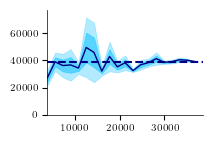

In [287]:
iterations, endpoints, endpoints_std, true_endpoint = read_from_txt(f'{aeons_dir}/notebooks/summer_1/toy_predictions_gauss/wedding')
plt.figure(figsize=(2.2, 1.5))
plt.plot(iterations, endpoints, lw=1, color='navy')
plt.fill_between(iterations, endpoints - endpoints_std, endpoints + endpoints_std, alpha=.5, color='deepskyblue')
plt.fill_between(iterations, endpoints - 2*endpoints_std, endpoints + 2*endpoints_std, alpha=.3, color='deepskyblue')
plt.axhline(y=true_endpoint, ls='--', color='navy')
plt.xlim(iterations[0], true_endpoint)
plt.ylim(0, true_endpoint*2)
plt.tight_layout()
plt.savefig(f'{proj_dir}/paper/Figures/wedding_predictions.pdf', format='pdf')

#### Cauchy

In [255]:
samples = cauchy_samples(nlive=500, ndims=10, gamma=0.0001)

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


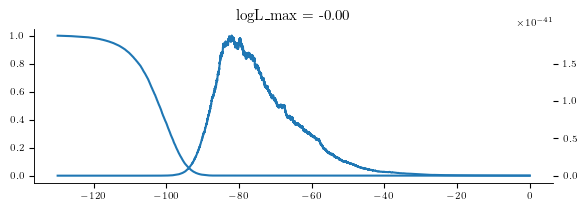

In [235]:
samples = pickle_in(f'{aeons_dir}/samples/toy/cauchy_10_0001.pickle')
model = EndModel(samples)
model.plot_lx()

In [256]:
model = EndModel(samples)
true_endpoint = IncrementEndpoint(samples, N_rolling=500).true_endpoint

In [257]:
iterations = np.linspace(true_endpoint*0.01, true_endpoint, 10, endpoint=False).astype(int)
logXfs, logXfs_std = model.logXfs(iterations, Nset=25)
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = endpoints_calc(iterations, logXs, logXfs, logXfs_std, nlive=500)

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))
/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/scipy/special/_logsumexp.py:111: RuntimeWarning: overflow encountered in exp
  tmp = np.exp(a - a_max)
/home/zixiao/Documents/III/project/aeons/aeons/endpoint.py:24: RuntimeWarning: invalid value encountered in double_scalars
  xf_reg = gammaincinv(d/2, np.exp(logend)/gamma(d/2))


In [259]:
write_to_txt(f'{aeons_dir}/notebooks/summer_1/toy_predictions_gauss/cauchy', [iterations, endpoints, endpoints_std, true_endpoint])

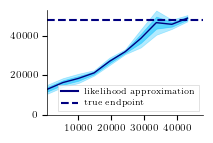

In [294]:
iterations, endpoints, endpoints_std, true_endpoint = read_from_txt(f'{aeons_dir}/notebooks/summer_1/toy_predictions_gauss/cauchy')
plt.figure(figsize=(2.2, 1.5))
plt.plot(iterations, endpoints, lw=1, color='navy')
plt.fill_between(iterations, endpoints - endpoints_std, endpoints + endpoints_std, alpha=.5, color='deepskyblue')
plt.fill_between(iterations, endpoints - 2*endpoints_std, endpoints + 2*endpoints_std, alpha=.3, color='deepskyblue')
plt.axhline(y=true_endpoint, ls='--', color='navy')
plt.xlim(iterations[0], true_endpoint)
plt.ylim(0, true_endpoint*1.1)
from matplotlib.lines import Line2D
line0 = Line2D([0], [0], color='navy', label='likelihood approximation')
line2 = Line2D([0], [0], ls='--', color='navy', label='true endpoint')
plt.legend(handles=[line0, line2], fontsize=6, frameon=True)
plt.tight_layout()
plt.savefig(f'{proj_dir}/paper/Figures/cauchy_predictions.pdf', format='pdf')

#### Plots of all three

In [300]:
samples_g = pickle_in('../../samples/toy/gauss_30_01.pickle')
samples_w = pickle_in('../../samples/toy/wedding_20_001.pickle')
samples_c = pickle_in('../../samples/toy/cauchy_10_0001.pickle')

In [34]:
ndims = 4
alpha = 0.2
sigma = 0.5
nlive = 500

In [30]:
def i(x):
    """Plateau number of a parameter point."""
    r = abs(x)
    return np.floor(ndims*np.log(2*r)/np.log(alpha))

def logL(x):
    """Gaussian log-likelihood."""
    ri = alpha**(i(x)/ndims)/2
    return - ri**2/(2*sigma**2)

def wedding(X, Y):
    R = np.sqrt(X**2 + Y**2)
    return np.exp(logL(R))

/tmp/ipykernel_123344/3660969107.py:13: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.line.set_lw(0)
/tmp/ipykernel_123344/3660969107.py:14: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.line.set_lw(0)
/tmp/ipykernel_123344/3660969107.py:15: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.line.set_lw(0)


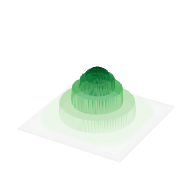

In [79]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = wedding(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(5, 2)
ax.set_box_aspect(aspect = (1,1,0.5))
surf = ax.plot_surface(X, Y, Z, cmap='Greens', rcount=200, ccount=200)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.w_xaxis.line.set_lw(0)
ax.w_yaxis.line.set_lw(0)
ax.w_zaxis.line.set_lw(0)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
fig.tight_layout()
fig.savefig(f'{proj_dir}/paper/Figures/wedding_3d.pdf', format='pdf', bbox_inches='tight')

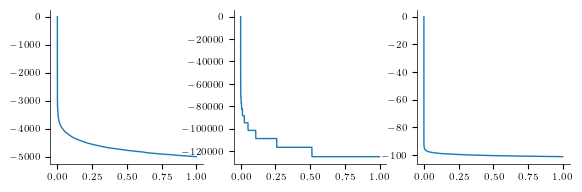

In [307]:
fig, axs = plt.subplots(1, 3, figsize=(6.7, 2))
for i, sample in enumerate([samples_g, samples_w, samples_c]):
    logL = sample.logL
    L = np.exp(sample.logL)
    logX = sample.logX()
    X = np.exp(logX)
    axs[i].plot(X, logL, lw=1)

### End